<a href="https://colab.research.google.com/github/Nischay-verma/Marks_prediction/blob/main/marks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Marks Prediction


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Nischay-verma/Marks_prediction/main/student_information.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
df.shape

(200, 2)

## Describe the data

In [4]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


## Ploting the Data

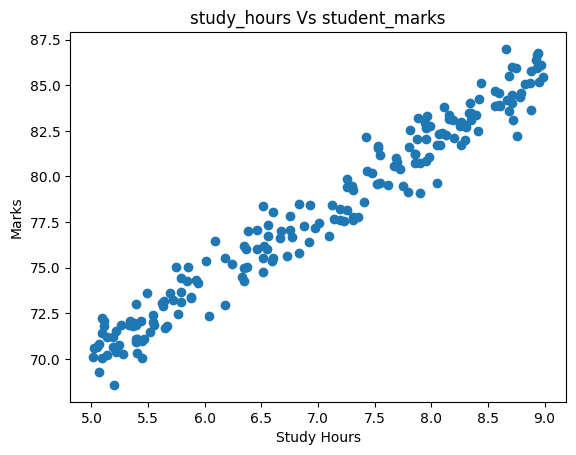

In [6]:
plt.scatter(x= df.study_hours, y = df.student_marks)
plt.title("study_hours Vs student_marks")
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.show()

# Data Cleaning

In [7]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [8]:
df= df.fillna(df.mean())

In [9]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

# Allocating X and y

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


## Split the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Prepare the ML model

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)
y_pred

array([77.61322931, 79.79207885, 84.3832261 , 83.17707724, 80.06443504,
       72.59409376, 76.3292644 , 84.77230637, 73.2166222 , 78.31357381,
       80.84259559, 71.85484124, 81.42621601, 75.82346005, 71.6603011 ,
       77.90873079, 82.16546853, 72.74972587, 81.62075614, 82.5545488 ,
       73.45007037, 81.65966417, 76.64052862, 76.01800018, 71.62139308,
       70.99886464, 74.73403528, 71.89374927, 72.24392152, 77.90873079,
       83.44943344, 85.2392027 , 76.95179284, 85.43374284, 70.49306028,
       70.57087634, 75.51219583, 85.43374284, 71.15449675, 72.16610546])

In [13]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours",	"student_marks_actual", "predicted_marks"])

,study_hours,student_marks_actual,predicted_marks
0,6.920000,76.38,77.613229
1,7.480000,80.17,79.792079
2,8.660000,86.99,84.383226
3,8.350000,83.50,83.177077
4,7.550000,79.64,80.064435
5,5.630000,72.87,72.594094
6,6.590000,75.37,76.329264
7,8.760000,82.21,84.772306
8,5.790000,74.44,73.216622
9,7.100000,76.76,78.313574


In [14]:
reg.score(X_test, y_test)

0.9464897639129054

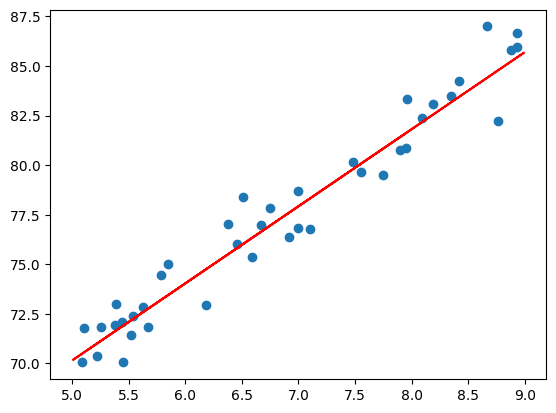

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_train, reg.predict(X_train), color="red")

# Save MI model

In [16]:
import joblib
joblib.dump(reg, "marks_predictor_model1.pkl")

['marks_predictor_model1.pkl']

## Prediction form User input

In [18]:
hours = int(input("Enter the no. of hours you study: "))
model = joblib.load('marks_predictor_model1.pkl')
result = model.predict([[hours]]).round(2)
print(f"Based on your {hours} you studied, You got {result} marks. ")

Enter the no. of hours you study: 6
Based on your 6 you studied, You got [74.03] marks. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
